## Importing the relevant packages

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats.distributions import chi2 
from math import sqrt
import seaborn as sns
sns.set()

## Importing the Data and Pre-processing 

In [143]:
raw_csv_data = pd.read_csv("Index2018.csv") 
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')

In [144]:
df_comp['market_value']=df_comp.ftse

In [145]:
#del df_comp['spx']
#del df_comp['dax']
#del df_comp['ftse']
#del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

In [146]:
import warnings
warnings.filterwarnings("ignore")

## The LLR Test

In [147]:
def LLR_test(mod_1, mod_2, DF = 1):
    L1 = mod_1.fit(start_ar_lags = 11).llf
    L2 = mod_2.fit(start_ar_lags = 11).llf
    LR = (2*(L2-L1))    
    p = chi2.sf(LR, DF).round(3)
    return p

## Plot ACF And PACF Function

In [148]:
def plot_acf(df,lags=40,zero=False,ylim_lower=-1,ylim_upper=1):
    sgt.plot_acf(df,lags=40,zero=False)
    plt.ylim(ylim_lower,ylim_upper)
    plt.title("ACF")
    plt.show()
    
def plot_pacf(df,lags=40,zero=False,method=('ols')):
    sgt.plot_pacf(df,lags=40,zero=False,method=('ols'))
    plt.title("PACF")
    plt.show()
  

## Creating Returns

In [149]:
df['returns'] = df.market_value.pct_change(1)*100

## Creating ARIMA Function

In [150]:
def ARIMA_test(df,p,d,q):
    ans=[]
    result=pd.DataFrame(columns=('p,d,q pair','pvalues','log likelihood','aic'))
    for i in range(1,p+1):
        for j in range(1,q+1):
            model=ARIMA(df,order=(i,d,j))
            try:
                res=model.fit()
            except:
                print("some error",[i,d,j])
            
            if((res.pvalues[:-1]>0.05).sum()==0):
                ans.append([i,d,j])
                ans.append(np.around(res.pvalues[:-1].values,decimals=3))
                ans.append(res.llf)
                ans.append(res.aic)
                s=pd.Series(ans,index=['p,d,q pair','pvalues','log likelihood','aic'])
                result=result.append(s,ignore_index=True)
                ans=[]
            else:
                continue
    return result

# ARIMA models should'nt be used on Stationary DATA

- Here is why.
- When you add level of integration on stationary data, it goes one level down to find the price, that is the difference price from one past value, which increases the computational complexity of the program. The goal of using ARIMA is to try to convert non stationary data into stationary data using integration and then run ARMA on it. If you apply integration on already stationary data, you might lose information, also remember that for every level of integration we lose one data point from the beginning. 
- The more layer you add the more complex it gets, ARIMA(p,4,q) means that we take difference of price 4 times which increases the complexity and interpretabilty


### What does the code below contains?
- I tried to run ARIMA(p,1,q) on returns and later ARIMA(p,1,q) on market_value which is supposed to be done here. 

## ARIMA on Returns

## ARIMA(1,1,1)

In [55]:
arima111_ret_model=ARIMA(df['returns'],order=(1,1,1))
arima111_ret_result=arima111_ret_model.fit()
arima111_ret_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5021
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -7940.989
Date:                Mon, 18 Jul 2022   AIC                          15887.978
Time:                        15:53:46   BIC                          15907.541
Sample:                    01-07-1994   HQIC                         15894.833
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0229      0.009     -2.658      0.008      -0.040      -0.006
ma.L1         -0.9996      0.001  -1056.477      0.000      -1.001      -0.998
sigma2         1.3798      0.014     99.562      0.000       1.353       1.407
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              7889.88
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               2.04   Skew:                            -0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [95]:
#arima111_ret_result.pvalues.values

In [96]:
#np.around(arima111_ret_result.pvalues.values,decimals=3)

## Residuals of the ARIMA(1,1,1)

In [ ]:
# Now we find the ACF of residuals of ARIMA (1,1,1) 

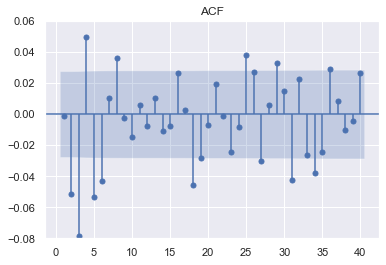

In [97]:
plot_acf(arima111_ret_result.resid[1:],ylim_lower=-0.08,ylim_upper=0.06)

In [ ]:
# We can see that till 6th lag we have significance

In [99]:
# The other way around is finding it manually

## Higher-Lag ARIMA Models

In [22]:
arima112_ret_model=ARIMA(df['returns'],order=(1,1,2))
arima112_ret_result=arima112_ret_model.fit()
arima112_ret_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5021
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -7938.086
Date:                Mon, 18 Jul 2022   AIC                          15884.171
Time:                        15:27:19   BIC                          15910.256
Sample:                    01-07-1994   HQIC                         15893.312
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8439      0.066    -12.864      0.000      -0.973      -0.715
ma.L1         -0.1774      0.070     -2.523      0.012      -0.315      -0.040
ma.L2         -0.8224      0.071    -11.648      0.000      -0.961      -0.684
sigma2         1.3779      0.015     91.811      0.000       1.348       1.407
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              7603.10
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               2.03   Skew:                            -0.04
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [23]:
arima113_ret_model=ARIMA(df['returns'],order=(1,1,3))
arima113_ret_result=arima113_ret_model.fit()
arima113_ret_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5021
Model:                 ARIMA(1, 1, 3)   Log Likelihood               -7938.077
Date:                Mon, 18 Jul 2022   AIC                          15886.155
Time:                        15:27:22   BIC                          15918.761
Sample:                    01-07-1994   HQIC                         15897.580
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8438      0.078    -10.827      0.000      -0.997      -0.691
ma.L1         -0.1777      0.083     -2.140      0.032      -0.340      -0.015
ma.L2         -0.8224      0.085     -9.627      0.000      -0.990      -0.655
ma.L3       7.449e-05      0.010      0.008      0.994      -0.019       0.019
sigma2         1.3778      0.035     39.679      0.000       1.310       1.446
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              7602.95
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               2.03   Skew:                            -0.04
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [24]:
arima114_ret_model=ARIMA(df['returns'],order=(1,1,4))
arima114_ret_result=arima114_ret_model.fit()
arima114_ret_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5021
Model:                 ARIMA(1, 1, 4)   Log Likelihood               -7908.001
Date:                Mon, 18 Jul 2022   AIC                          15828.003
Time:                        15:27:26   BIC                          15867.130
Sample:                    01-07-1994   HQIC                         15841.714
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4707      0.060     -7.895      0.000      -0.588      -0.354
ma.L1         -0.5516      0.064     -8.584      0.000      -0.678      -0.426
ma.L2         -0.5118      0.065     -7.918      0.000      -0.638      -0.385
ma.L3         -0.0546      0.009     -5.828      0.000      -0.073      -0.036
ma.L4          0.1180      0.008     14.943      0.000       0.102       0.133
sigma2         1.3613      0.042     32.536      0.000       1.279       1.443
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6411.85
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               2.01   Skew:                            -0.17
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [25]:
arima211_ret_model=ARIMA(df['returns'],order=(2,1,1))
arima211_ret_result=arima211_ret_model.fit()
arima211_ret_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5021
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -7934.574
Date:                Mon, 18 Jul 2022   AIC                          15877.149
Time:                        15:27:28   BIC                          15903.233
Sample:                    01-07-1994   HQIC                         15886.289
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0240      0.009     -2.757      0.006      -0.041      -0.007
ar.L2         -0.0499      0.008     -6.327      0.000      -0.065      -0.034
ma.L1         -0.9998      0.002   -578.853      0.000      -1.003      -0.996
sigma2         1.3761      0.014     98.367      0.000       1.349       1.403
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):              7744.05
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):               2.04   Skew:                            -0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [107]:
arima211_ret_result.pvalues[:-1]

ar.L1    5.833716e-03
ar.L2    2.504333e-10
ma.L1    0.000000e+00
dtype: float64

In [26]:
arima212_ret_model=ARIMA(df['returns'],order=(2,1,2))
arima212_ret_result=arima212_ret_model.fit()
arima212_ret_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5021
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -7938.077
Date:                Mon, 18 Jul 2022   AIC                          15886.155
Time:                        15:27:31   BIC                          15918.761
Sample:                    01-07-1994   HQIC                         15897.580
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8432      0.085     -9.912      0.000      -1.010      -0.676
ar.L2       1.017e-05      0.010      0.001      0.999      -0.019       0.019
ma.L1         -0.1783      0.090     -1.981      0.048      -0.355      -0.002
ma.L2         -0.8217      0.087     -9.443      0.000      -0.992      -0.651
sigma2         1.3778      0.037     37.067      0.000       1.305       1.451
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              7603.39
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               2.03   Skew:                            -0.04
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [27]:
arima213_ret_model=ARIMA(df['returns'],order=(2,1,3))
arima213_ret_result=arima213_ret_model.fit()
arima213_ret_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5021
Model:                 ARIMA(2, 1, 3)   Log Likelihood               -7931.235
Date:                Mon, 18 Jul 2022   AIC                          15874.471
Time:                        15:27:34   BIC                          15913.598
Sample:                    01-07-1994   HQIC                         15888.181
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4148      0.096    -14.807      0.000      -1.602      -1.228
ar.L2         -0.6508      0.087     -7.511      0.000      -0.821      -0.481
ma.L1          0.4246      0.094      4.540      0.000       0.241       0.608
ma.L2         -0.7401      0.032    -22.900      0.000      -0.803      -0.677
ma.L3         -0.6844      0.081     -8.488      0.000      -0.842      -0.526
sigma2         1.3745      0.017     80.849      0.000       1.341       1.408
===================================================================================
Ljung-Box (L1) (Q):                   3.90   Jarque-Bera (JB):              7348.55
Prob(Q):                              0.05   Prob(JB):                         0.00
Heteroskedasticity (H):               2.04   Skew:                            -0.04
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [28]:
arima214_ret_model=ARIMA(df['returns'],order=(2,1,4))
arima214_ret_result=arima214_ret_model.fit()
arima214_ret_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5021
Model:                 ARIMA(2, 1, 4)   Log Likelihood               -7906.766
Date:                Mon, 18 Jul 2022   AIC                          15827.531
Time:                        15:27:38   BIC                          15873.180
Sample:                    01-07-1994   HQIC                         15843.527
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5600      0.057     -9.761      0.000      -0.672      -0.448
ar.L2         -0.4150      0.066     -6.332      0.000      -0.543      -0.287
ma.L1         -0.4622      0.057     -8.099      0.000      -0.574      -0.350
ma.L2         -0.1871      0.072     -2.606      0.009      -0.328      -0.046
ma.L3         -0.4667      0.065     -7.159      0.000      -0.594      -0.339
ma.L4          0.1163      0.009     12.505      0.000       0.098       0.135
sigma2         1.3601      0.015     91.878      0.000       1.331       1.389
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6517.03
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.99   Skew:                            -0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [29]:
arima311_ret_model=ARIMA(df['returns'],order=(3,1,1))
arima311_ret_result=arima311_ret_model.fit()
arima311_ret_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5021
Model:                 ARIMA(3, 1, 1)   Log Likelihood               -7917.901
Date:                Mon, 18 Jul 2022   AIC                          15845.801
Time:                        15:27:41   BIC                          15878.407
Sample:                    01-07-1994   HQIC                         15857.227
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0281      0.009     -3.150      0.002      -0.046      -0.011
ar.L2         -0.0519      0.008     -6.644      0.000      -0.067      -0.037
ar.L3         -0.0813      0.008     -9.914      0.000      -0.097      -0.065
ma.L1         -1.0000      0.017    -60.568      0.000      -1.032      -0.968
sigma2         1.3667      0.025     53.860      0.000       1.317       1.416
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):              6871.02
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               2.02   Skew:                            -0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [42]:
arima312_ret_model=ARIMA(df['returns'],order=(3,1,2))
arima312_ret_result=arima312_ret_model.fit()
arima312_ret_result.summary()

LinAlgError: LU decomposition error.

In [43]:
arima313_ret_model=ARIMA(df['returns'],order=(3,1,3))
arima313_ret_result=arima313_ret_model.fit()
arima313_ret_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5021
Model:                 ARIMA(3, 1, 3)   Log Likelihood               -7907.611
Date:                Mon, 18 Jul 2022   AIC                          15829.221
Time:                        15:45:33   BIC                          15874.870
Sample:                    01-07-1994   HQIC                         15845.217
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7268      0.048    -15.061      0.000      -0.821      -0.632
ar.L2         -0.5935      0.053    -11.100      0.000      -0.698      -0.489
ar.L3         -0.1153      0.009    -12.256      0.000      -0.134      -0.097
ma.L1         -0.2949      0.049     -6.041      0.000      -0.391      -0.199
ma.L2         -0.1669      0.057     -2.945      0.003      -0.278      -0.056
ma.L3         -0.5370      0.054     -9.977      0.000      -0.642      -0.432
sigma2         1.3597      0.015     92.205      0.000       1.331       1.389
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6513.51
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               1.98   Skew:                            -0.10
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [44]:
arima314_ret_model=ARIMA(df['returns'],order=(3,1,4))
arima314_ret_result=arima314_ret_model.fit()
arima314_ret_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5021
Model:                 ARIMA(3, 1, 4)   Log Likelihood               -7916.310
Date:                Mon, 18 Jul 2022   AIC                          15848.620
Time:                        15:45:45   BIC                          15900.789
Sample:                    01-07-1994   HQIC                         15866.900
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0679      0.073    -14.706      0.000      -1.210      -0.926
ar.L2         -0.9185      0.080    -11.416      0.000      -1.076      -0.761
ar.L3         -0.3702      0.068     -5.414      0.000      -0.504      -0.236
ma.L1          0.0623      0.076      0.816      0.415      -0.087       0.212
ma.L2         -0.1652      0.045     -3.673      0.000      -0.253      -0.077
ma.L3         -0.6018      0.044    -13.700      0.000      -0.688      -0.516
ma.L4         -0.2780      0.073     -3.787      0.000      -0.422      -0.134
sigma2         1.3661      0.015     91.292      0.000       1.337       1.395
===================================================================================
Ljung-Box (L1) (Q):                   0.65   Jarque-Bera (JB):              6826.26
Prob(Q):                              0.42   Prob(JB):                         0.00
Heteroskedasticity (H):               1.99   Skew:                             0.04
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [45]:
arima411_ret_model=ARIMA(df['returns'],order=(4,1,1))
arima411_ret_result=arima411_ret_model.fit()
arima411_ret_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5021
Model:                 ARIMA(4, 1, 1)   Log Likelihood               -7912.446
Date:                Mon, 18 Jul 2022   AIC                          15836.892
Time:                        15:45:48   BIC                          15876.019
Sample:                    01-07-1994   HQIC                         15850.603
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0242      0.009     -2.715      0.007      -0.042      -0.007
ar.L2         -0.0494      0.008     -6.281      0.000      -0.065      -0.034
ar.L3         -0.0800      0.008     -9.701      0.000      -0.096      -0.064
ar.L4          0.0466      0.008      5.672      0.000       0.031       0.063
ma.L1         -1.0000      0.020    -50.205      0.000      -1.039      -0.961
sigma2         1.3638      0.030     46.009      0.000       1.306       1.422
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):              6591.63
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               2.01   Skew:                            -0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [46]:
arima412_ret_model=ARIMA(df['returns'],order=(4,1,2))
arima412_ret_result=arima412_ret_model.fit()
arima412_ret_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5021
Model:                 ARIMA(4, 1, 2)   Log Likelihood               -7917.216
Date:                Mon, 18 Jul 2022   AIC                          15848.432
Time:                        15:45:50   BIC                          15894.081
Sample:                    01-07-1994   HQIC                         15864.428
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9910      0.040    -24.655      0.000      -1.070      -0.912
ar.L2         -0.0788      0.012     -6.817      0.000      -0.101      -0.056
ar.L3         -0.1312      0.011    -11.419      0.000      -0.154      -0.109
ar.L4         -0.0736      0.010     -7.505      0.000      -0.093      -0.054
ma.L1         -0.0362      0.039     -0.920      0.358      -0.113       0.041
ma.L2         -0.9632      0.039    -24.495      0.000      -1.040      -0.886
sigma2         1.3667      0.015     92.871      0.000       1.338       1.395
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):              6677.38
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               2.02   Skew:                            -0.16
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [47]:
arima413_ret_model=ARIMA(df['returns'],order=(4,1,3))
arima413_ret_result=arima413_ret_model.fit()
arima413_ret_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5021
Model:                 ARIMA(4, 1, 3)   Log Likelihood               -7909.223
Date:                Mon, 18 Jul 2022   AIC                          15834.447
Time:                        15:45:55   BIC                          15886.616
Sample:                    01-07-1994   HQIC                         15852.728
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4541      0.108    -13.505      0.000      -1.665      -1.243
ar.L2         -0.6079      0.072     -8.387      0.000      -0.750      -0.466
ar.L3         -0.1703      0.016    -10.812      0.000      -0.201      -0.139
ar.L4         -0.1010      0.014     -7.286      0.000      -0.128      -0.074
ma.L1          0.4313      0.108      3.982      0.000       0.219       0.644
ma.L2         -0.9076      0.065    -13.868      0.000      -1.036      -0.779
ma.L3         -0.5229      0.071     -7.387      0.000      -0.662      -0.384
sigma2         1.3624      0.015     91.922      0.000       1.333       1.391
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6557.08
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               2.01   Skew:                            -0.14
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [48]:
arima414_ret_model=ARIMA(df['returns'],order=(4,1,4))
arima414_ret_result=arima414_ret_model.fit()
arima414_ret_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5021
Model:                 ARIMA(4, 1, 4)   Log Likelihood               -7906.690
Date:                Mon, 18 Jul 2022   AIC                          15831.380
Time:                        15:46:00   BIC                          15890.071
Sample:                    01-07-1994   HQIC                         15851.946
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5174      0.304     -4.995      0.000      -2.113      -0.922
ar.L2         -1.1129      0.215     -5.165      0.000      -1.535      -0.691
ar.L3         -0.5802      0.144     -4.027      0.000      -0.863      -0.298
ar.L4         -0.0901      0.038     -2.357      0.018      -0.165      -0.015
ma.L1          0.4966      0.304      1.634      0.102      -0.099       1.092
ma.L2         -0.4596      0.124     -3.701      0.000      -0.703      -0.216
ma.L3         -0.6164      0.097     -6.375      0.000      -0.806      -0.427
ma.L4         -0.4196      0.126     -3.324      0.001      -0.667      -0.172
sigma2         1.3609      0.015     90.708      0.000       1.332       1.390
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6517.64
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               1.99   Skew:                            -0.11
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# Now instead of doing it manually I have created a function ARIMA_test

In [98]:
ARIMA_test(df['returns'],6,1,6)

some error [3, 1, 2]


,"p,d,q pair",pvalues,log likelihood,aic
0,"[1, 1, 1]","[0.008, 0.0, 0.0]",-7940.988820,15887.977639
1,"[1, 1, 2]","[0.0, 0.012, 0.0, 0.0]",-7938.085603,15884.171206
2,"[1, 1, 4]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",-7908.001467,15828.002935
3,"[2, 1, 1]","[0.006, 0.0, 0.0, 0.0]",-7934.574354,15877.148707
4,"[2, 1, 3]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",-7931.235381,15874.470763
5,"[2, 1, 4]","[0.0, 0.0, 0.0, 0.009, 0.0, 0.0, 0.0]",-7906.765680,15827.531359
6,"[3, 1, 1]","[0.002, 0.0, 0.0, 0.0, 0.0]",-7917.900641,15845.801282
7,"[3, 1, 2]","[0.002, 0.0, 0.0, 0.0, 0.0]",-7917.900641,15845.801282
8,"[3, 1, 3]","[0.0, 0.0, 0.0, 0.0, 0.003, 0.0, 0.0]",-7907.610737,15829.221473
9,"[3, 1, 5]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",-7906.379073,15830.758147


In [129]:
ARIMA_test(df['returns'],6,0,6)

,"p,d,q pair",pvalues,log likelihood,aic


In [100]:
# We see that ARIMA (6,1,1) performs best
# We find the residual of ARIMA (6,1,1)

In [104]:
arima611_ret_model=ARIMA(df['returns'],order=(6,1,1))
arima611_ret_result=arima611_ret_model.fit()

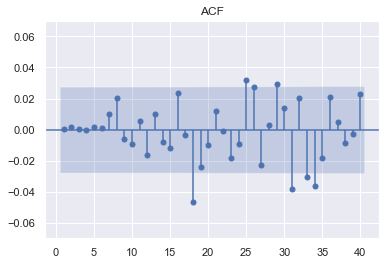

In [105]:
plot_acf(arima611_ret_result.resid[1:],ylim_lower=-0.07,ylim_upper=0.07)

## ARIMA on Price data

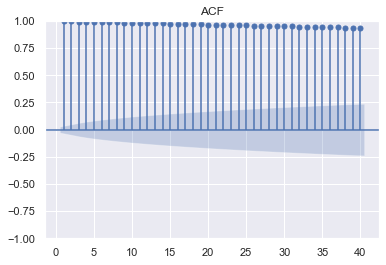

In [140]:
plot_acf(df['market_value'])

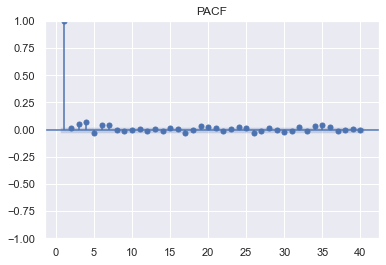

In [111]:
plot_pacf(df['market_value'])

In [112]:
ARIMA_test(df['market_value'],7,1,7)

,"p,d,q pair",pvalues,log likelihood,aic
0,"[1, 1, 1]","[0.0, 0.0]",-27604.005078,55214.010157
1,"[1, 1, 2]","[0.0, 0.0, 0.0]",-27600.407633,55208.815265
2,"[1, 1, 3]","[0.0, 0.0, 0.0, 0.0]",-27590.723482,55191.446964
3,"[2, 1, 1]","[0.0, 0.0, 0.0]",-27600.130551,55208.261102
4,"[2, 1, 3]","[0.0, 0.0, 0.0, 0.002, 0.0]",-27590.022881,55192.045761
5,"[3, 1, 1]","[0.0, 0.0, 0.0, 0.0]",-27592.336116,55194.672233
6,"[3, 1, 2]","[0.0, 0.0, 0.0, 0.0, 0.0]",-27590.920318,55193.840636
7,"[3, 1, 3]","[0.017, 0.002, 0.0, 0.021, 0.014, 0.0]",-27587.182932,55188.365864
8,"[5, 1, 1]","[0.009, 0.0, 0.0, 0.0, 0.0, 0.006]",-27586.844610,55187.689219
9,"[5, 1, 2]","[0.0, 0.0, 0.0, 0.001, 0.0, 0.0, 0.001]",-27584.444965,55184.889930


In [128]:
ARIMA_test(df['market_value'],7,0,7)

,"p,d,q pair",pvalues,log likelihood,aic
0,"[1, 0, 2]","[0.0, 0.0, 0.011, 0.0]",-27615.553332,55241.106664
1,"[1, 0, 5]","[0.0, 0.0, 0.042, 0.0, 0.0, 0.001, 0.001]",-27596.360533,55208.721066
2,"[2, 0, 2]","[0.0, 0.0, 0.0, 0.0, 0.0]",-27607.752934,55227.505868
3,"[2, 0, 3]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",-27597.951624,55209.903248
4,"[3, 0, 1]","[0.0, 0.0, 0.0, 0.0, 0.0]",-27607.468252,55226.936505
5,"[4, 0, 1]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",-27599.497197,55212.994395
6,"[4, 0, 2]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",-27606.749393,55229.498785
7,"[6, 0, 2]","[0.001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",-27590.599899,55201.199798


In [122]:
#ARIMA(df['market_value'],order=(6,1,2)).fit().summary()

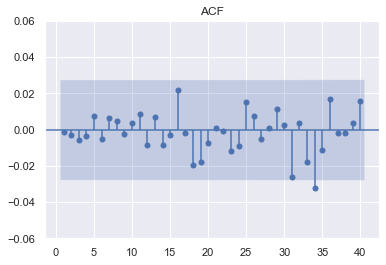

In [124]:
# We see that [5,1,2] is the best arima model.
plot_acf(ARIMA(df['market_value'],order=(5,1,2)).fit().resid,ylim_lower=-0.06,ylim_upper=0.06)

(-600.0, 600.0)

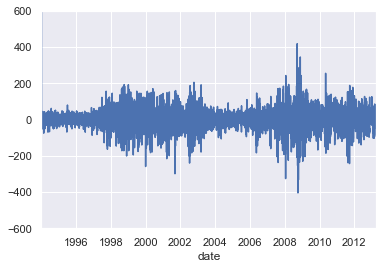

In [126]:
ARIMA(df['market_value'],order=(5,1,2)).fit().resid.plot()
plt.ylim(-600,600)

## Models with Higher Levels of Integration

### Now How do we determine d or level or integration for ARIMA

In [130]:
# First of all, we need d>0 for non stationary data so that we can convert it into stationary data 
# d=1 means that we take one difference between present and past values to see if it creates stationarity or not
# but to find what is the level of integration works for us is important.
# To get around this we manually create the integrated data and do the DF test to check for stationarity

In [131]:
# To find d=1 we use diff method and pass value as 1, which shows that we need differnece one value apart

In [132]:
df['delta_price']=df['market_value'].diff(1)
df['delta_price']

date
1994-01-07      NaN
1994-01-10    -5.40
1994-01-11   -26.81
1994-01-12   -41.75
1994-01-13   -12.01
              ...  
2013-04-01     0.00
2013-04-02    78.92
2013-04-03   -70.38
2013-04-04   -76.17
2013-04-05   -94.34
Freq: B, Name: delta_price, Length: 5021, dtype: float64

In [ ]:
# Now we want to find if what we did was right or not, so for that 
# ARIMA(1,1,1)(price) should be equal to ARIMA(1,0,1)(delta price)

In [133]:
ARIMA(df['market_value'],order=(1,1,1)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -27604.005
Date:                Mon, 18 Jul 2022   AIC                          55214.010
Time:                        18:29:59   BIC                          55233.574
Sample:                    01-07-1994   HQIC                         55220.865
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7459      0.059     12.656      0.000       0.630       0.861
ma.L1         -0.7920      0.053    -14.927      0.000      -0.896      -0.688
sigma2      3498.6490     40.930     85.479      0.000    3418.428    3578.870
===================================================================================
Ljung-Box (L1) (Q):                   2.62   Jarque-Bera (JB):              3326.25
Prob(Q):                              0.11   Prob(JB):                         0.00
Heteroskedasticity (H):               1.90   Skew:                            -0.32
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [136]:
ARIMA(df['delta_price'],order=(1,0,1)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            delta_price   No. Observations:                 5021
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -27603.666
Date:                Mon, 18 Jul 2022   AIC                          55215.333
Time:                        18:30:53   BIC                          55241.418
Sample:                    01-07-1994   HQIC                         55224.473
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5639      0.753      0.749      0.454      -0.911       2.039
ar.L1          0.7476      0.059     12.673      0.000       0.632       0.863
ma.L1         -0.7937      0.053    -14.871      0.000      -0.898      -0.689
sigma2      3496.6353     41.191     84.888      0.000    3415.902    3577.368
===================================================================================
Ljung-Box (L1) (Q):                   2.64   Jarque-Bera (JB):              3330.33
Prob(Q):                              0.10   Prob(JB):                         0.00
Heteroskedasticity (H):               1.90   Skew:                            -0.32
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [137]:
# Since these two are almost same, we can conform that what we did was right. 
# Now we can do DF test on delta_price to see if its stationary or not

In [139]:
sts.adfuller(df['delta_price'][1:])

(-32.244093495707446,
 0.0,
 5,
 5014,
 {'1%': -3.4316548765428174,
  '5%': -2.8621166146845334,
  '10%': -2.5670769326348926},
 54845.96104221891)

In [141]:
# Thus we can confirm that d=1 is stationary and no further layer of integration is not required
# So we try ARIMA(p,1,q) and try to find the best model and then we analyze the residuals for white noise

In [159]:
df[['spx','nikkei']]

,spx,nikkei
date,,
1994-01-07,469.900000,18124.01
1994-01-10,475.270000,18443.44
1994-01-11,474.130000,18485.25
1994-01-12,474.170000,18793.88
1994-01-13,472.470000,18577.26
...,...,...
2013-04-01,1562.173837,12135.02
2013-04-02,1570.252238,12003.43
2013-04-03,1553.686978,12362.20


## ARIMAX 

In [162]:
arimax111_model=ARIMA(df['market_value'],exog=df[['spx','nikkei']],order=(1,1,1))
arimax111_result=arimax111_model.fit()
arimax111_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -26526.195
Date:                Tue, 19 Jul 2022   AIC                          53062.391
Time:                        12:56:15   BIC                          53094.997
Sample:                    01-07-1994   HQIC                         53073.816
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
spx            2.5015      0.035     70.556      0.000       2.432       2.571
nikkei         0.0629      0.003     24.388      0.000       0.058       0.068
ar.L1          0.2254      0.030      7.560      0.000       0.167       0.284
ma.L1         -0.5208      0.026    -19.695      0.000      -0.573      -0.469
sigma2      2276.3161     28.859     78.877      0.000    2219.754    2332.879
===================================================================================
Ljung-Box (L1) (Q):                   0.26   Jarque-Bera (JB):              2861.02
Prob(Q):                              0.61   Prob(JB):                         0.00
Heteroskedasticity (H):               1.17   Skew:                            -0.39
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## SARIMAX

In [163]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [165]:
sarimax_model=SARIMAX(df.market_value,exog=df.spx,order=(1,0,1),seasonal_order=(2,0,1,5))
sarimax_res=sarimax_model.fit()
sarimax_res.summary()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.61406D+00    |proj g|=  3.31141D-01

At iterate    5    f=  5.36916D+00    |proj g|=  4.07136D-02

At iterate   10    f=  5.33449D+00    |proj g|=  8.82036D-03

At iterate   15    f=  5.32970D+00    |proj g|=  4.86540D-02

At iterate   20    f=  5.32286D+00    |proj g|=  8.95252D-04

At iterate   25    f=  5.32278D+00    |proj g|=  3.50920D-03

At iterate   30    f=  5.32138D+00    |proj g|=  7.02430D-03

At iterate   35    f=  5.32049D+00    |proj g|=  8.00098D-03

At iterate   40    f=  5.32022D+00    |proj g|=  4.90401D-03

At iterate   45    f=  5.32018D+00    |proj g|=  1.36626D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   50    f=  5.32017D+00    |proj g|=  8.33335D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     95      2     0     0   8.333D-05   5.320D+00
  F =   5.3201745653816790     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                      market_value   No. Observations:                 5021
Model:             SARIMAX(1, 0, 1)x(2, 0, 1, 5)   Log Likelihood              -26712.596
Date:                           Tue, 19 Jul 2022   AIC                          53439.193
Time:                                   14:02:41   BIC                          53484.843
Sample:                               01-07-1994   HQIC                         53455.189
                                    - 04-05-2013                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
spx            2.7051      0.035     76.412      0.000       2.636       2.774
ar.L1          0.9998      0.000   2581.566      0.000       0.999       1.001
ma.L1         -0.3104      0.009    -32.716      0.000      -0.329      -0.292
ar.S.L5        0.9653      0.009    105.430      0.000       0.947       0.983
ar.S.L10       0.0344      0.008      4.121      0.000       0.018       0.051
ma.S.L5       -0.9990      0.006   -159.447      0.000      -1.011      -0.987
sigma2      2437.9477     28.299     86.150      0.000    2382.483    2493.413
===================================================================================
Ljung-Box (L1) (Q):                   1.65   Jarque-Bera (JB):              4204.40
Prob(Q):                              0.20   Prob(JB):                         0.00
Heteroskedasticity (H):               1.23   Skew:                            -0.52
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [168]:
# sarimax_model=SARIMAX(df.market_value,exog=df.spx,order=(1,0,1),seasonal_order=(2,0,1,5))
# sarimax_res=sarimax_model.fit(method='bfgs')
# sarimax_res.summary()

### Note
- We see we have multiple seasonality around the month end

In [169]:
pip install tbats

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 595.9/595.9 kB 10.7 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


In [171]:
from tbats import TBATS

In [172]:
help(TBATS)

Help on class TBATS in module tbats.tbats.TBATS:

class TBATS(tbats.abstract.Estimator.Estimator)
 |  TBATS(use_box_cox=None, box_cox_bounds=(0, 1), use_trend=None, use_damped_trend=None, seasonal_periods=None, use_arma_errors=True, show_warnings=True, n_jobs=None, multiprocessing_start_method='spawn', context=None)
 |  
 |  TBATS estimator used to fit and select best performing model.
 |  
 |  TBATS (Exponential smoothing state space model with Box-Cox
 |  transformation, ARMA errors, Trigonometric Trend and Seasonal components.)
 |  
 |  Model has been described in De Livera, Hyndman & Snyder (2011).
 |  
 |  All of the useful methods have been implemented in parent Estimator class.
 |  
 |  Method resolution order:
 |      TBATS
 |      tbats.abstract.Estimator.Estimator
 |      sklearn.base.BaseEstimator
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, use_box_cox=None, box_cox_bounds=(0, 1), use_trend=None, use_damped_trend=None, seasonal_periods=None